# Descomposición SVD (Singular-Value-Decomposition)


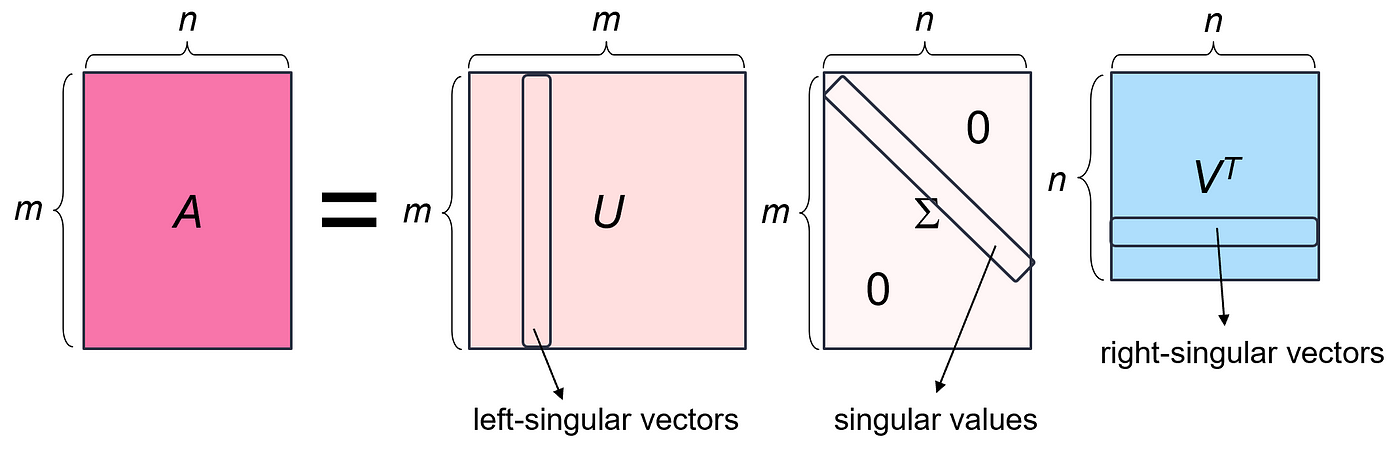

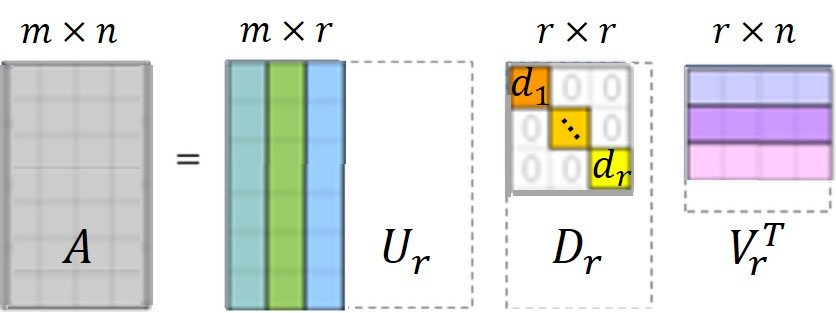

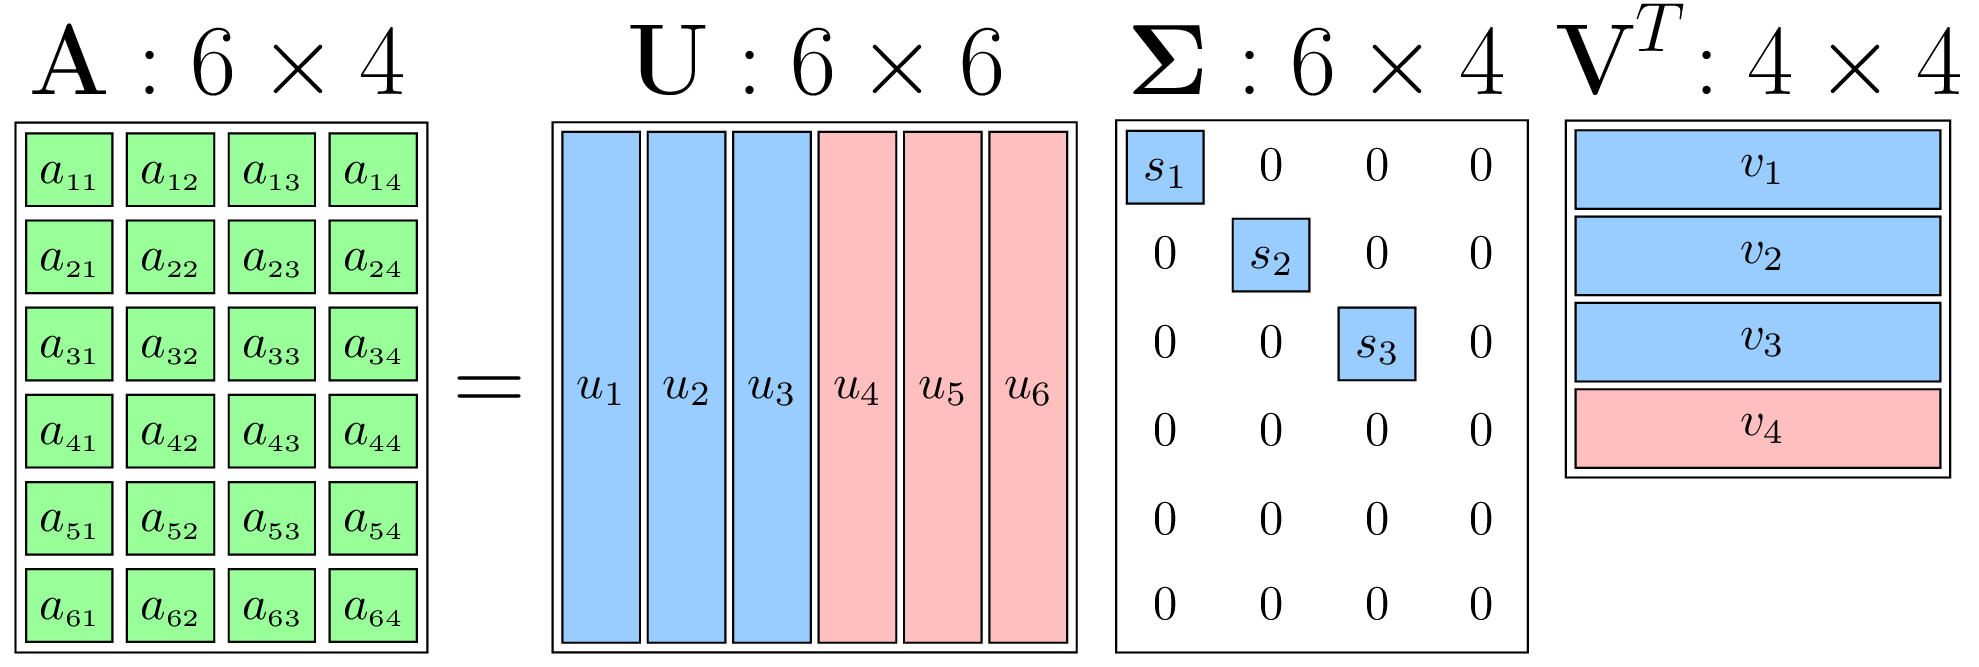

## Además, las filas de U y columnas de V son orthonormales es decir:
Filas de $U$:
$$U_i \cdot U_j = 0\\
U_i \cdot U_i = 1$$

Columnas de $V$:
$$V_i \cdot V_j = 0\\
V_i \cdot V_i = 1$$
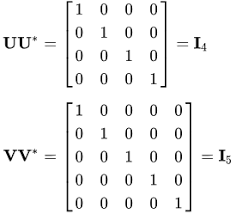

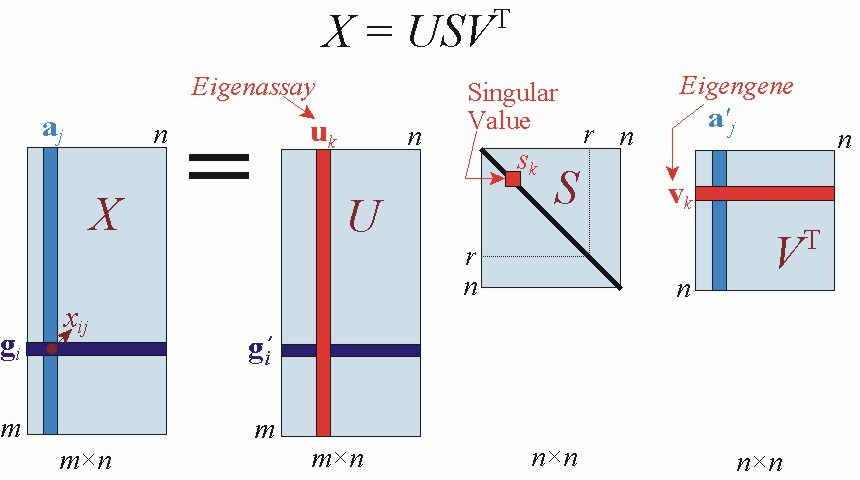

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

In [101]:
X=np.array([[1,1,2,0,3,0,4],
            [2,1,3,1,4,1,2]]).T


Y=np.array([[1,2,3,4],
            [10,9,8,7]])
Y

array([[ 1,  2,  3,  4],
       [10,  9,  8,  7]])

In [63]:
A=X@Y # matriz 7x2 x 2x4 == 7x4
A

array([[21, 20, 19, 18],
       [11, 11, 11, 11],
       [32, 31, 30, 29],
       [10,  9,  8,  7],
       [43, 42, 41, 40],
       [10,  9,  8,  7],
       [24, 26, 28, 30]])

In [102]:
# Esta función hace la descomposición SVD
U, S, Vh = np.linalg.svd(A)

In [103]:
U.shape, S.shape, Vh.shape
# habría que hacer S como matriz

((7, 7), (4,), (4, 4))

In [106]:
U.round(3)

array([[-0.307, -0.256, -0.531, -0.065, -0.686, -0.289,  0.   ],
       [-0.173,  0.052, -0.249, -0.069,  0.224,  0.08 , -0.919],
       [-0.481, -0.204,  0.571, -0.626, -0.077, -0.033, -0.051],
       [-0.134, -0.308, -0.347, -0.188,  0.665, -0.484,  0.236],
       [-0.654, -0.152,  0.189,  0.704,  0.116,  0.049,  0.044],
       [-0.134, -0.308, -0.347, -0.188,  0.116,  0.82 ,  0.216],
       [-0.425,  0.823, -0.232, -0.182,  0.067,  0.032,  0.222]])

In [110]:
fila = 0
np.linalg.norm(U[fila,:]) # U tiene las filas ortonormales (que es un vector de longitud 1)

0.9999999999999999

In [111]:
U[0,:]@U[1,:] # es 0 

2.222614453595284e-18

In [113]:
S.round(4)

array([126.9358,   6.4267,   0.    ,   0.    ])

In [116]:
# V tiene las columnas ortonormales (que es un vector de longitud 1)
columna=0
np.linalg.norm(Vh[:,columna])

1.0

# Podemos hacer una aproximación de la matiz original a partir de las matrices U, S y Vh

In [119]:
np.diag(S[:2]).round(3)
# con la función diag podemos hacer una matriz diagonal con los valores que nos han dado

array([[126.936,   0.   ],
       [  0.   ,   6.427]])

In [120]:
Vh[:2, :]

array([[-0.51011701, -0.50333399, -0.49655098, -0.48976796],
       [-0.66315959, -0.21599743,  0.23116472,  0.67832687]])

In [128]:
# Cuantas dimensiones utilizamos?
i=1
rec=U[:, :i] @ np.diag(S[:i]) @ Vh[:i, :]
# rec = reconstruccion

# U[:, :i] = todas las filas pero solo hasta la columna i
# np.diag(S[:i]) = una matriz diagonal con solo los i primeros valores de S
# Vh[:i, :] = una matriz con todas las columnas y las filas hasta i

rec

array([[19.9095756 , 19.64483832, 19.38010104, 19.11536377],
       [11.2212833 , 11.07207409, 10.92286488, 10.77365568],
       [31.1308589 , 30.71691241, 30.30296593, 29.88901945],
       [ 8.6882923 ,  8.57276423,  8.45723616,  8.34170809],
       [42.35214219, 41.7889865 , 41.22583081, 40.66267512],
       [ 8.6882923 ,  8.57276423,  8.45723616,  8.34170809],
       [27.50854859, 27.1427679 , 26.77698722, 26.41120653]])

In [129]:
A

array([[21, 20, 19, 18],
       [11, 11, 11, 11],
       [32, 31, 30, 29],
       [10,  9,  8,  7],
       [43, 42, 41, 40],
       [10,  9,  8,  7],
       [24, 26, 28, 30]])

In [130]:
# no hay diferencia entre A y esta reconstruccion
(A-rec).round(10)

array([[ 1.0904244 ,  0.35516168, -0.38010104, -1.11536377],
       [-0.2212833 , -0.07207409,  0.07713512,  0.22634432],
       [ 0.8691411 ,  0.28308759, -0.30296593, -0.88901945],
       [ 1.3117077 ,  0.42723577, -0.45723616, -1.34170809],
       [ 0.64785781,  0.2110135 , -0.22583081, -0.66267512],
       [ 1.3117077 ,  0.42723577, -0.45723616, -1.34170809],
       [-3.50854859, -1.1427679 ,  1.22301278,  3.58879347]])

# Caso aplicado a una fotografía en blanco y negro

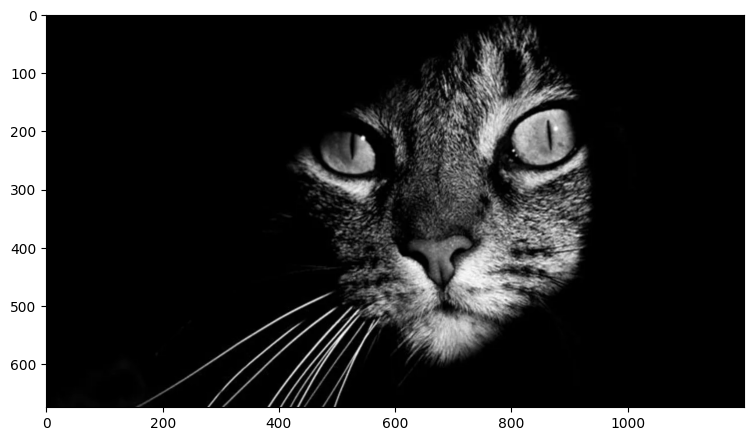

In [131]:
imggray = Image.open('fotografia-blanco-y-negro.jpg')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

## Codigo para transformarlo en una matriz de numpy de escala de colores blanco y negro

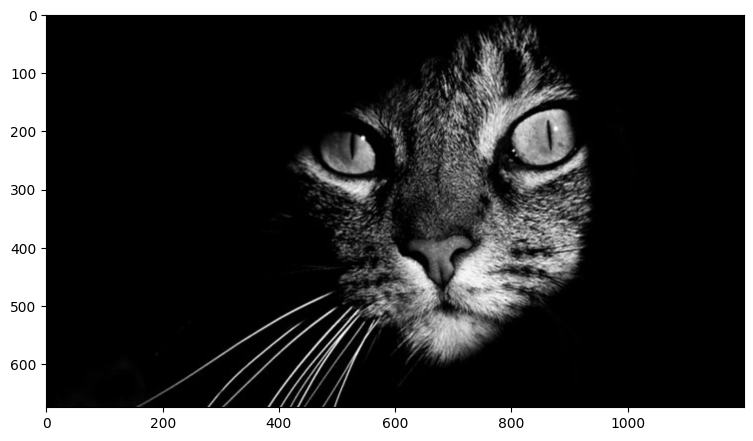

In [133]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

In [135]:
# Es una matriz con una escala de grises
imgmat.shape

(675, 1200)

In [136]:
675*1200

810000

In [78]:
imgmat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [137]:
U, sigma, V = np.linalg.svd(imgmat)

In [138]:
U.shape

(675, 675)

In [139]:
V.shape

(1200, 1200)

In [140]:
sigma.shape

(675,)

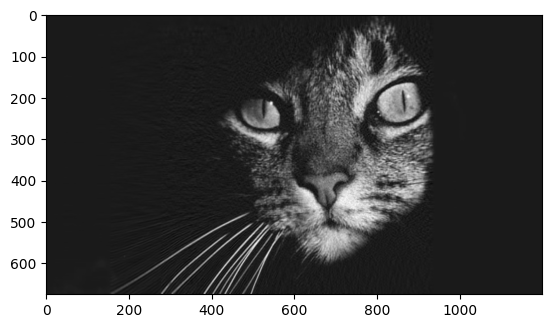

In [141]:
# Cuantas dimensiones
i=100
reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
plt.imshow(reconstimg, cmap='gray');

In [142]:
675*1200

810000

In [83]:
num_dim=100
# U+S+V
675*num_dim + num_dim**2 + num_dim*1200

197500

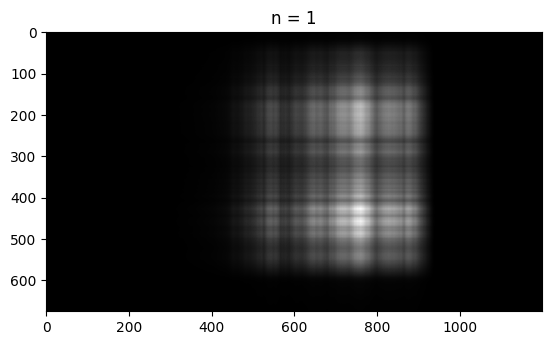

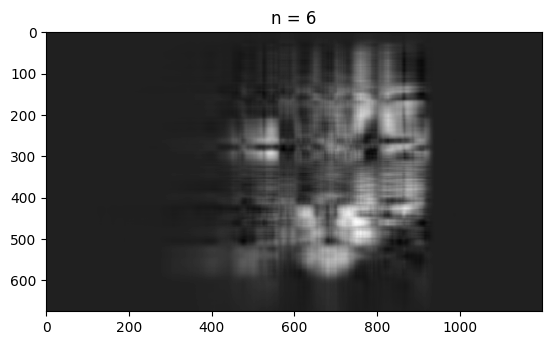

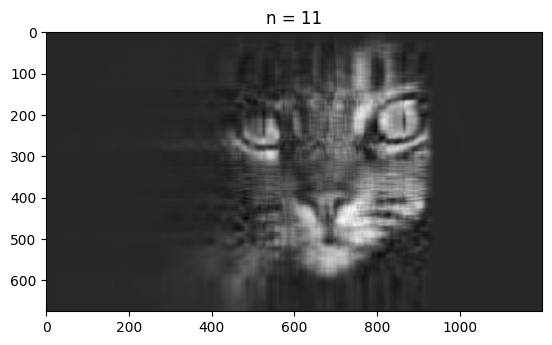

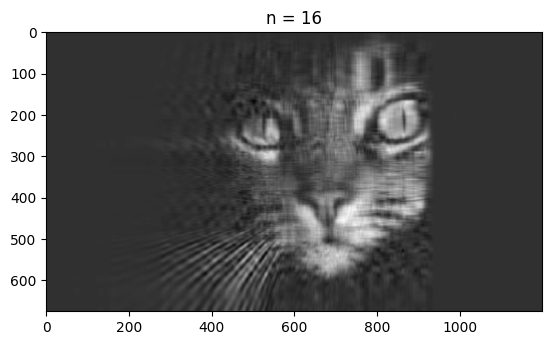

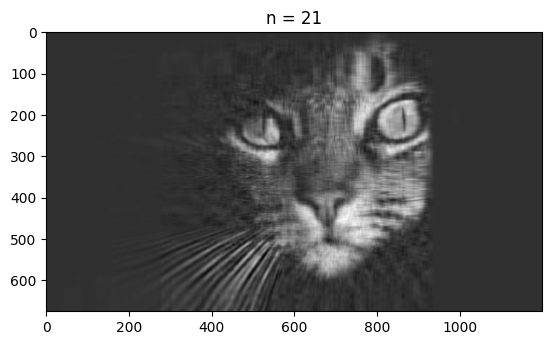

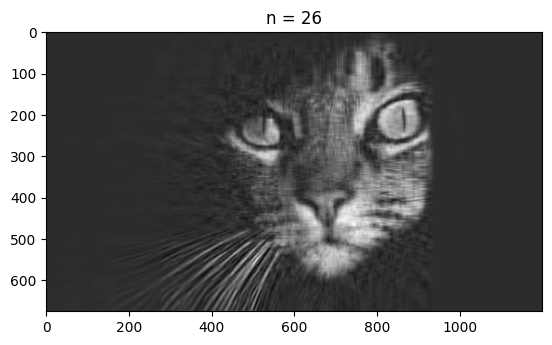

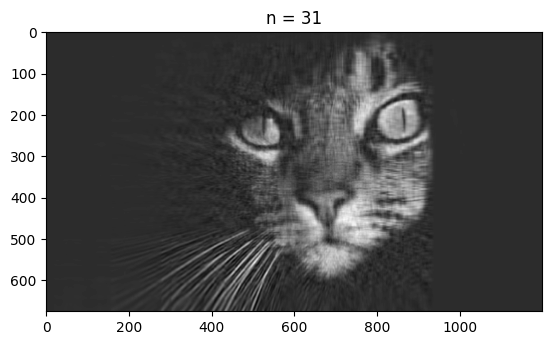

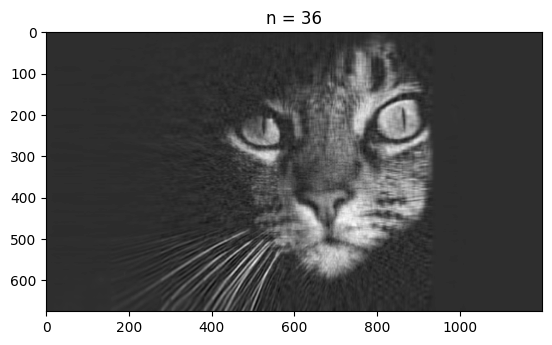

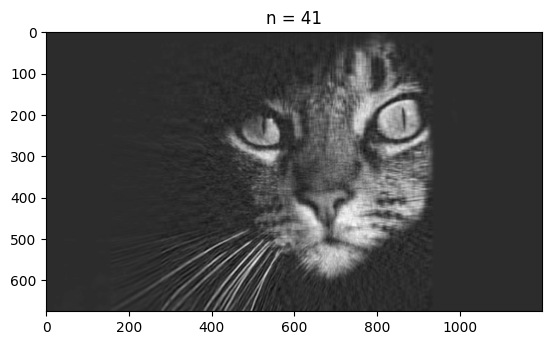

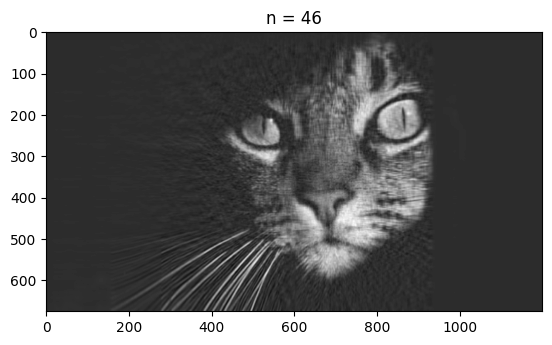

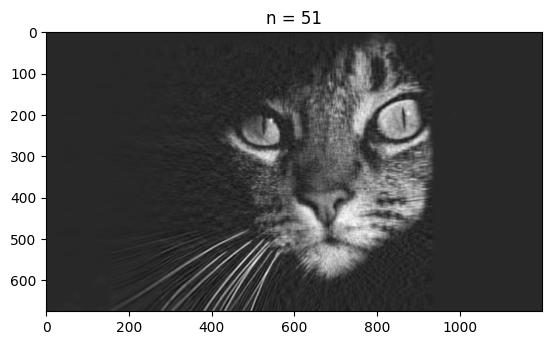

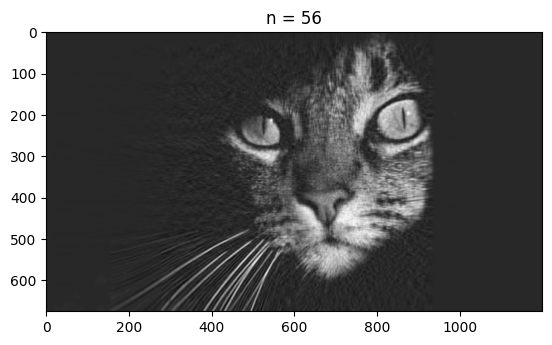

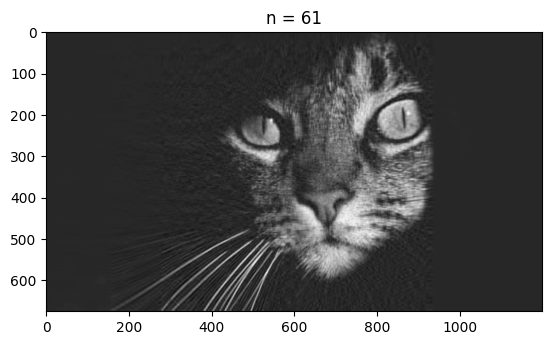

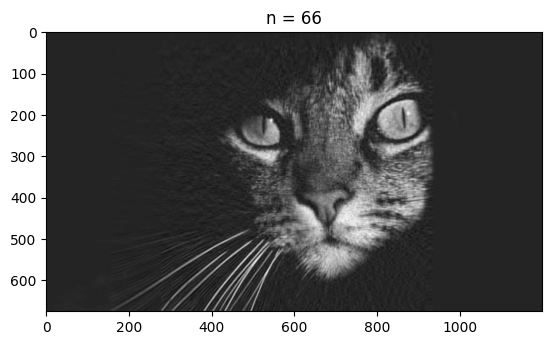

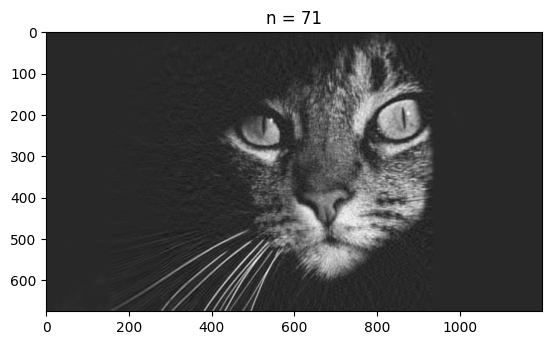

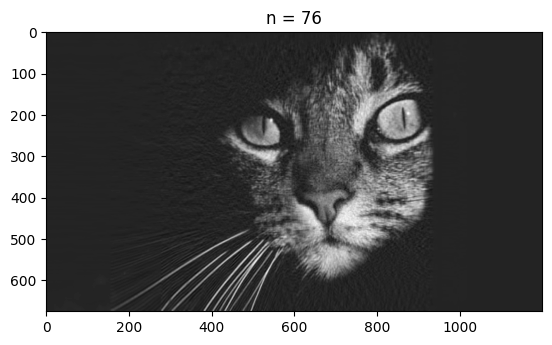

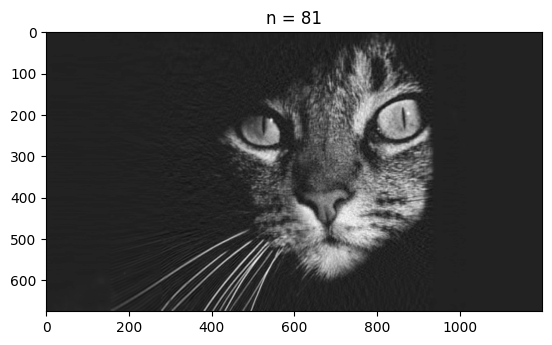

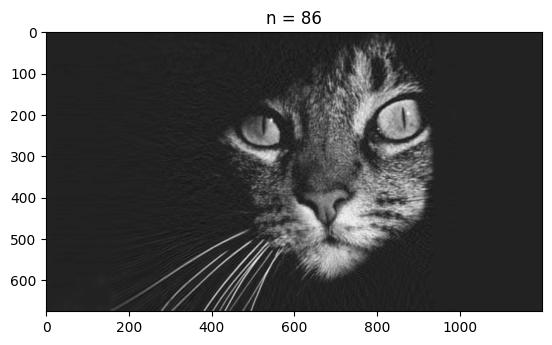

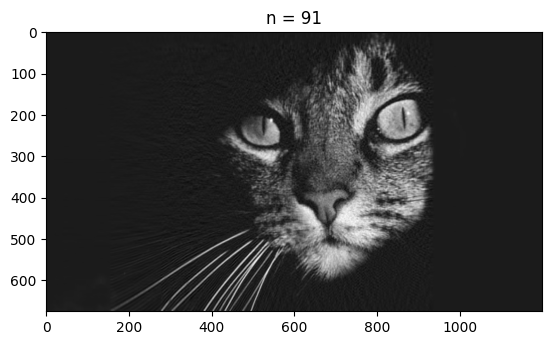

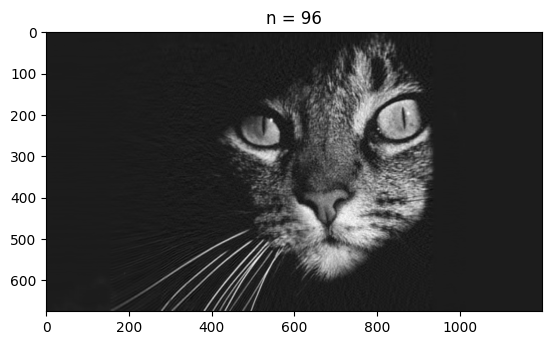

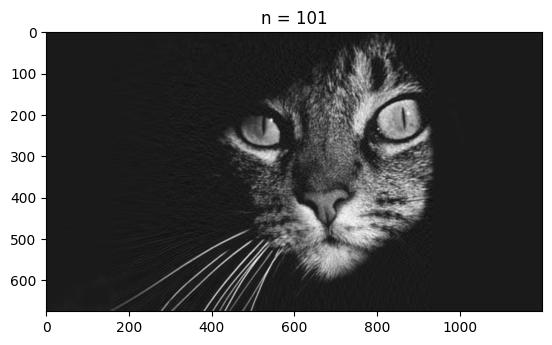

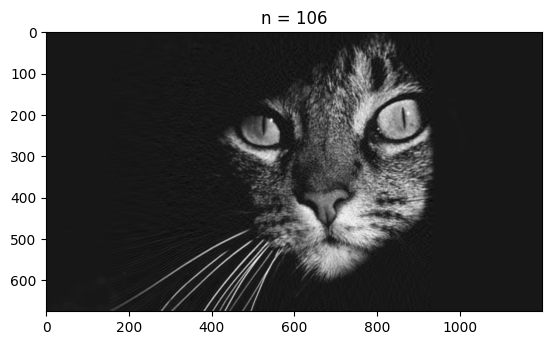

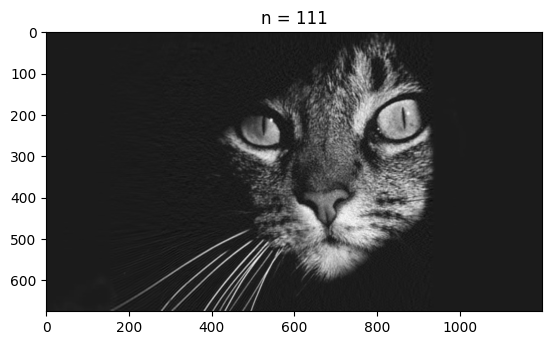

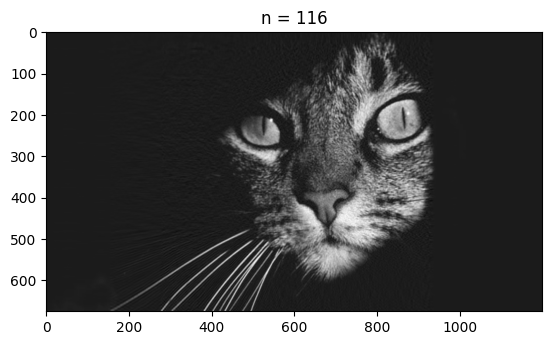

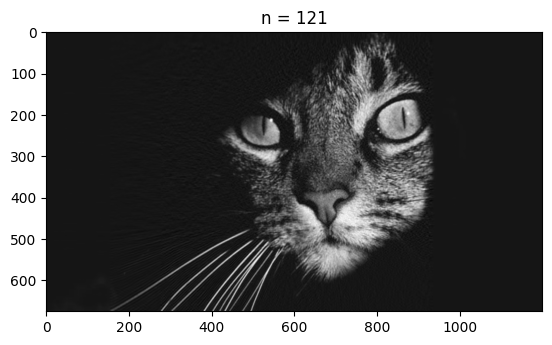

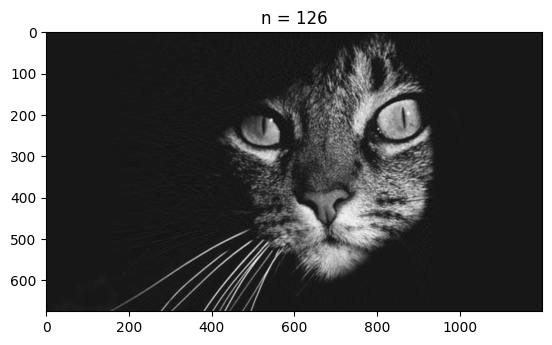

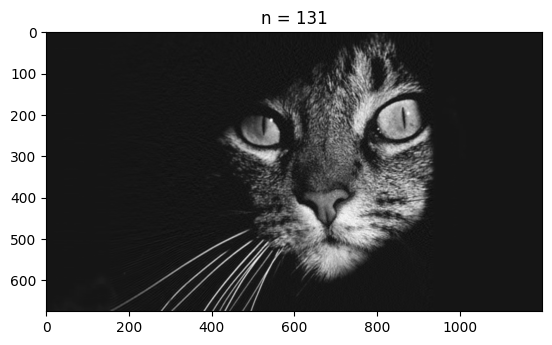

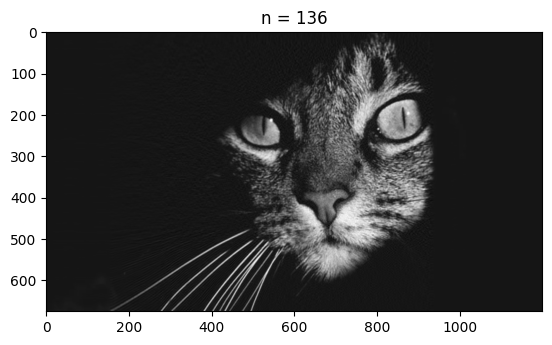

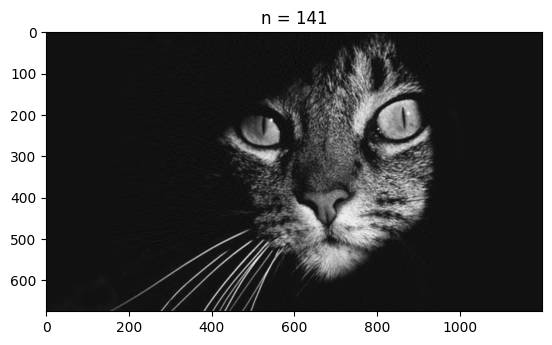

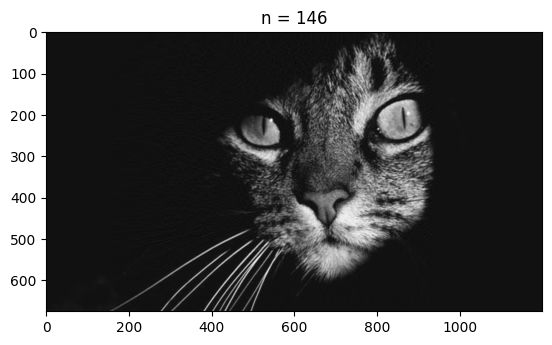

In [144]:
for i in range(1, 151, 5):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()